In [1]:
import numpy as np
import copy 
import random


# Environemnts 

rewards = np.ones((36,4))*-1

    
    
for i in range(5):
    rewards[1+6*i,0] = -5
    rewards[4+6*i,1] = -5
    rewards[4+6*i,3] = -5

    
rewards[8,0] = -5
rewards[3,1] = -5
rewards[15,1] = -5
rewards[21,1] = -5
rewards[34,0] = -5
rewards[34,1] = -5
rewards[34,2] = -5
rewards[34,3] = -5
rewards[4,2] = -5
rewards[16,2] = -5
rewards[7,2] = -5
rewards[9,3] = -5
rewards[21,3] = -5
rewards[27,3] = -5


rewards[27,0] = 5
rewards[25,1] = 5
rewards[31,0] = 5
rewards[31,1] = 5
rewards[31,2] = 5
rewards[31,3] = 5

In [2]:
# Parameters
gamma = 1
alpha = 0.05
num_episode = 5000
min_difference = 1e-12
goal_state = 32
epsilon = 0.1

In [3]:
def next_State(state, action):
    if state<30:
        if action == 0:
            state_next = state + 5
        elif action == 1:
            state_next = state + 7
        elif action == 2:
            state_next = state + 6
        elif action == 3:
            state_next = state + 1
    else:
        state_next = state + 1
    return state_next

In [4]:
def Action_greedy(state):
    if np.random.uniform(0,1) < epsilon:
        # Choose a random action
        action = random.randint(0, 3)
    else:
        # Choose the action of a greedy policy
        action = np.argmax(rewards[state])
    return action

In [5]:
def Check_break(cur_state):
    Br = [0, 5, 6, 10, 11, 12, 13, 17, 18, 22, 23, 24, 28,29,30,35]
    for i in Br:
        if(i == cur_state):
            return 1
    else:
        return 0

In [6]:
def QLearning(Start_Point, rewards, goal_state=None, gamma=0.99, alpha=0.01, num_episode=1000, min_difference=1e-5):
    """ 
    Run Q-learning loop for num_episode iterations or till difference between Q is below min_difference.
    """
    Sum_reward = np.zeros(num_episode)
    Q = np.zeros(rewards.shape)
    #all_states = np.arange(len(rewards)) 
    #all_states = np.delete(all_states, [0, 5, 6, 10, 11, 12, 13, 17, 18, 22, 23, 24, 28,29,30,35], 0)
    for i in range(num_episode):
        Q_old = copy.deepcopy(Q)
        # initialize state
        #initial_state = np.random.choice(all_states)
        initial_state = Start_Point
        action = Action_greedy(initial_state)
        SS = next_State(initial_state, action)
        Q[initial_state][action] = Q[initial_state][action] + alpha * (rewards[initial_state][action] + gamma * np.max(Q[SS]) - Q[initial_state][action])
        cur_state = SS
        Sum_reward[i] = Sum_reward[i] + rewards[initial_state][action]

        # loop for each step of episode, until reaching goal state
        counter = 1
        while cur_state != goal_state:
            Check = Check_break(cur_state)
            if Check == 1:
                break
            # choose action form states using policy derived from Q
            action = Action_greedy(cur_state)
            #print("action: ", action)
            SS = next_State(cur_state, action)
            #print("SS: ", SS)
            Q[cur_state][action] = Q[cur_state][action] + alpha * (rewards[cur_state][action] + gamma * np.max(Q[SS]) - Q[cur_state][action])
            Sum_reward[i] = Sum_reward[i] + rewards[cur_state][action]
            counter = counter + 1
            cur_state = SS
        if cur_state != goal_state:
            Sum_reward[i] = -2
        else: 
            Sum_reward[i] = Sum_reward[i] / counter
            
    return Q, Sum_reward

In [7]:
Q, R = QLearning(1, rewards, goal_state=goal_state, gamma=gamma, alpha=alpha, num_episode=num_episode, min_difference=min_difference)           
Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-4.99673829,  1.        , -0.0268856 , -0.88259186],
       [-0.04217446, -0.05      ,  0.11867909, -0.23301959],
       [ 0.26154393,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.92746875,  0.99934785, -0.4875    ,  0.24705094],
       [-4.98762253,  2.        ,  0.98128607, -0.11210728],
       [ 0.97475761,  0.03048428,  0.195     ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.99999915,  0.60440223,  1.37891974,  0.67315914],
       [ 3.        , -4.98400391,  1.96115974,  0.89204374],
       [ 1.97663155, -1.

In [8]:
def navigate(Start_point):
    Start_point = Start_point - 1
    i = 0
    Q_nav = np.array(Q)
    while True:
        i = i + 1
        if np.argmax(Q_nav[Start_point])== 0:
            print("Right-Up")
            Start_point = Start_point + 5
            
        elif np.argmax(Q_nav[Start_point]) == 1:
            print("Right-Down")
            Start_point = Start_point + 7
            
        elif np.argmax(Q_nav[Start_point]) == 2:
            print("Right")
            Start_point = Start_point + 6
        elif np.argmax(Q_nav[Start_point]) == 3:
            print("Down")
            Start_point = Start_point + 1
            
        if Start_point == 32:
            print("Goal !")
            break
        if i > 10:
            break

In [9]:
Start_Point = np.array(2)
navigate(Start_Point)

Right-Down
Right-Down
Right-Up
Right-Up
Right-Down
Goal !


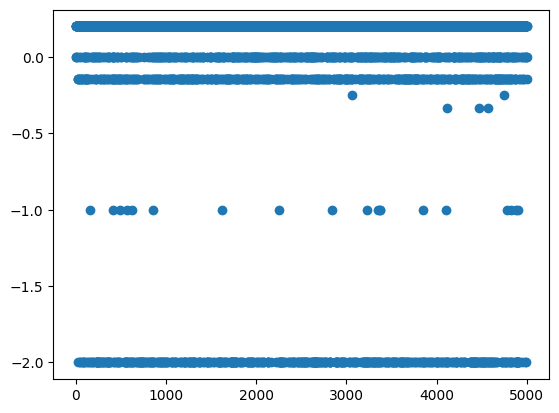

In [10]:
import matplotlib.pyplot as plt

X = np.arange(num_episode)+1

plt.scatter(X, R)
plt.show()

In [11]:
Q, R = QLearning(4, rewards, goal_state=goal_state, gamma=gamma, alpha=alpha, num_episode=num_episode, min_difference=min_difference)           
Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.97781493, -4.99219911, -4.99331171, -4.99364612],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.97444511,  0.82287323,  1.9788732 , -4.97932737],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 2.97513229,  1.97929429,  2.97022715,  1.90725982],
       [ 2.99958296, -0.92746875,  0.37076121,  0.19902098],
       [ 1.96045451, -0.

In [12]:
Start_Point = np.array(5)
navigate(Start_Point)

Right-Up
Right
Right-Up
Right-Up
Right-Down
Goal !


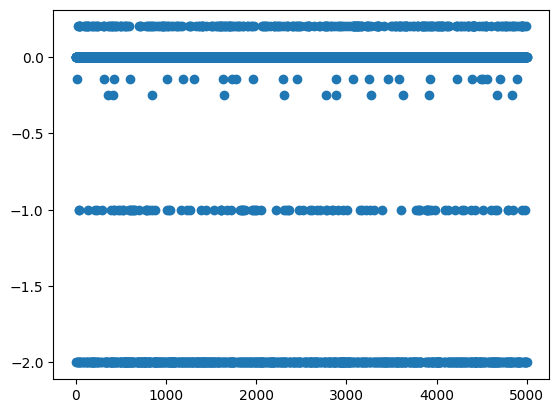

In [13]:
plt.scatter(X, R)
plt.show()